In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [4]:
with open("match_stats.json") as file:
    matches = json.loads(file.read())
stat_keys = matches[0]['home'].keys()
data = {}
data.update({'home_' + k: [] for k in stat_keys})
data.update({'guest_' + k: [] for k in stat_keys})

for match in matches:
    for key in match['home'].keys():
        data['home_' + key].append(match['home'][key])
    for key in match['guest'].keys():
        data['guest_' + key].append(match['guest'][key])

df = pd.DataFrame(data)

In [5]:
df.head()

,home_team,home_score,home_xG,home_possession,home_passing_accuracy,home_shots_on_target,home_yellow_cards_count,home_red_cards_count,home_fouls,home_corners,...,guest_crosses,guest_touches,guest_tackles,guest_interceptions,guest_aerials_won,guest_clearances,guest_offsides,guest_goal_kicks,guest_throw_ins,guest_long_balls
0,Crystal Palace,0,1.2,0.56,0.84,0.20,1,0,16,3,...,11,599,29,9,14,24,2,2,14,59
1,Fulham,2,1.2,0.33,0.60,0.25,2,0,7,4,...,18,784,11,10,13,16,4,5,35,94
2,Tottenham Hotspur,4,1.5,0.58,0.83,0.44,3,0,11,10,...,18,554,14,13,11,21,0,4,14,61
3,Newcastle United,2,1.7,0.61,0.79,0.39,0,0,9,11,...,9,475,15,10,16,37,0,12,26,70
4,Leeds United,2,0.8,0.40,0.74,0.33,2,0,13,6,...,20,720,16,14,7,17,1,9,23,72


In [10]:
df.describe()

,home_score,home_xG,home_possession,home_passing_accuracy,home_shots_on_target,home_yellow_cards_count,home_red_cards_count,home_fouls,home_corners,home_crosses,...,guest_crosses,guest_touches,guest_tackles,guest_interceptions,guest_aerials_won,guest_clearances,guest_offsides,guest_goal_kicks,guest_throw_ins,guest_long_balls
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.00000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.00000,1834.000000,1834.000000,1834.000000
mean,1.504907,1.459597,0.509553,0.770365,0.332770,1.607961,0.034351,10.491821,5.648310,19.647764,...,16.40458,606.242094,16.541439,10.338059,16.693566,22.523991,1.71265,7.833697,20.131407,68.393130
std,1.324670,0.822911,0.126357,0.074203,0.154987,1.244984,0.190952,3.407925,3.062734,8.356045,...,7.49540,133.001931,5.227156,4.130337,6.994573,10.120319,1.48929,3.465855,6.070747,13.462878
min,0.000000,0.000000,0.180000,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.00000,299.000000,3.000000,0.000000,1.000000,1.000000,0.00000,0.000000,3.000000,30.000000
25%,1.000000,0.800000,0.420000,0.720000,0.230000,1.000000,0.000000,8.000000,3.000000,13.000000,...,11.00000,502.000000,13.000000,7.000000,12.000000,15.000000,1.00000,5.000000,16.000000,59.000000
50%,1.000000,1.400000,0.510000,0.780000,0.330000,1.000000,0.000000,10.000000,5.000000,19.000000,...,16.00000,596.000000,16.000000,10.000000,16.000000,21.000000,1.00000,8.000000,20.000000,67.000000
75%,2.000000,2.000000,0.610000,0.830000,0.430000,2.000000,0.000000,13.000000,8.000000,25.000000,...,21.00000,696.750000,20.000000,13.000000,21.000000,28.000000,3.00000,10.000000,24.000000,78.000000
max,9.000000,5.900000,0.820000,0.920000,1.000000,7.000000,2.000000,23.000000,17.000000,62.000000,...,53.00000,1063.000000,46.000000,29.000000,52.000000,80.000000,10.00000,23.000000,44.000000,127.000000


Попробуем посмотреть, есть ли некоторые ожидаемые закономерности в наших данных, с помощью визуализации

Сравним количество забитых голов дома и в гостях (принято считать, что в гостях играть сложнее)

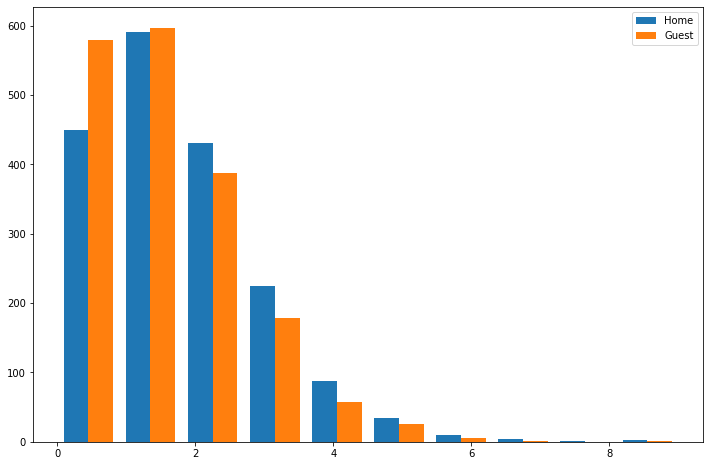

In [17]:
plt.figure(figsize=(12,8))
plt.hist([df['home_score'], df['guest_score']], label=['Home', 'Guest'])
plt.legend();

Заметно, что у распределения голов гостей более тяжелый левый хвост. Они чаще не забивают вовсе или ограничиваются одним голом, хозяева же чаще результативнее. Можно предположить, что это связано со тактикой команды — в гостях больше защищаемся и менее активно атакуем. Давайте попробуем это проверить

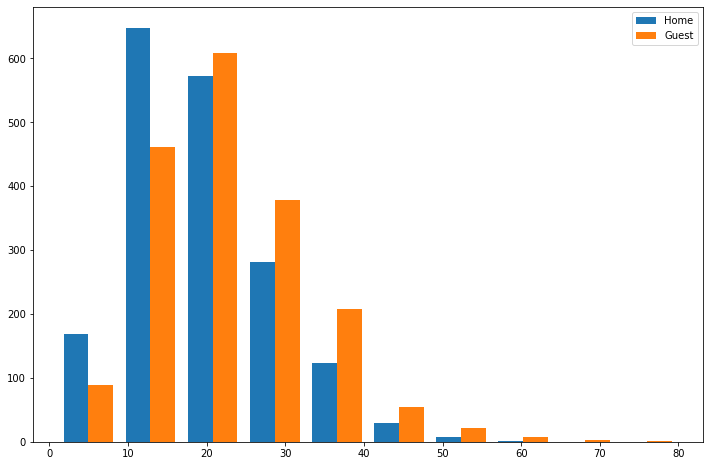

In [20]:
plt.figure(figsize=(12,8))
plt.hist([df['home_clearances'], df['guest_clearances']], label = ['Home', 'Guest'])
plt.legend();

Видно, что гости заметно чаще выбивают мяч, посмотрим другие показатели игры от защиты

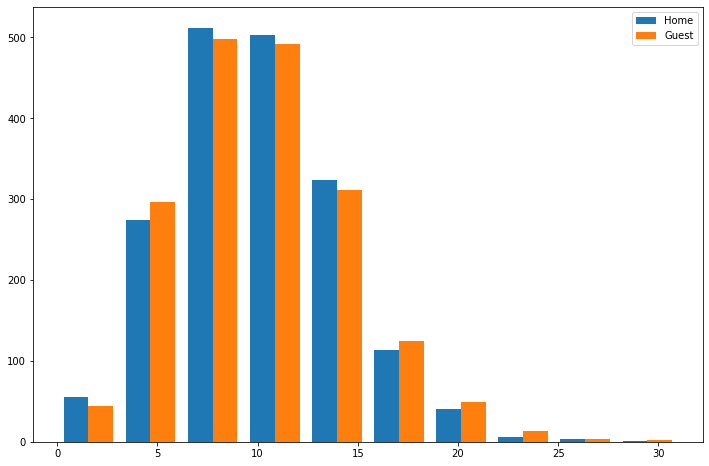

In [22]:
plt.figure(figsize=(12, 8))
plt.hist([df['home_interceptions'], df['guest_interceptions']], label=['Home', 'Guest'])
plt.legend();

А в количестве отборов различий нет. Интересно! Давайте посмотрим на корреляцию между показателями, связанными с игрой в защите и возможно найдем что-то интересное

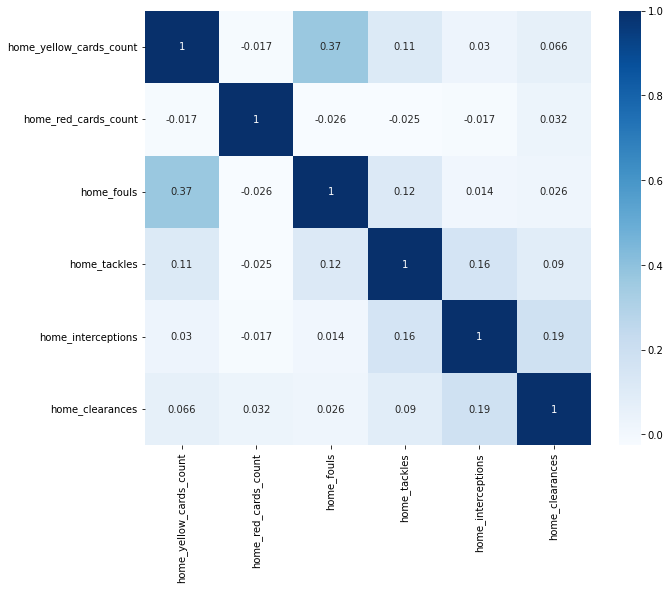

In [31]:
defensive_parametrs = ['home_yellow_cards_count', 'home_red_cards_count', 'home_fouls', 'home_tackles', 'home_interceptions', 'home_clearances']
plt.figure(figsize=(10, 8))
sns.heatmap(data=df[defensive_parametrs].corr(), annot=True, cmap='Blues');

Как заметно, почти везде корреляция достаточно слабая (кроме желтых карточек и фолов, что довольно очевидно). Об отсутствии зависимости говорить рано (вполне возможно она нелинейная), но это точно вопрос для дальнейшего изучения

Возможно низкая корреляция связана с тем, что каждый из этих показателей по-разному говорят об эффективности игры в защите. Например, перехват мяча позволяет дальше развить атаку, а выбивание его скорее говорит о неэффективности команды. Давайте сравним несколько показателей с количеством пропущенных и забитых голов

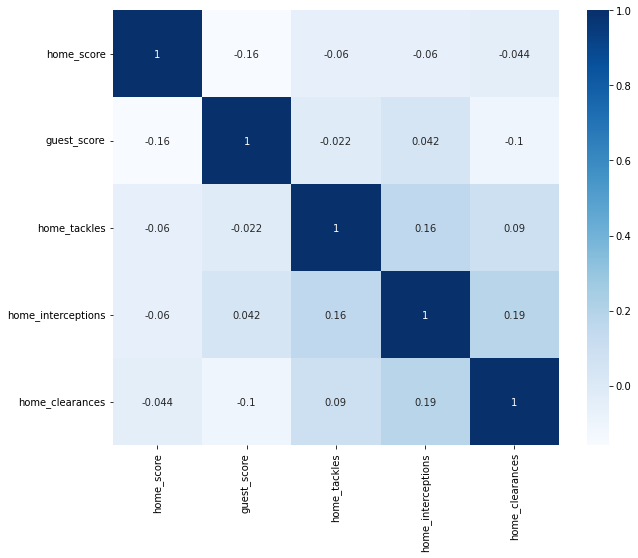

In [32]:
params = ['home_score', 'guest_score', 'home_tackles', 'home_interceptions', 'home_clearances']
plt.figure(figsize=(10, 8))
sns.heatmap(data=df[params].corr(), annot=True, cmap='Blues');

Пока зависимостей в вопросах защиты особо не видно, оставим их поиск на более поздний этап